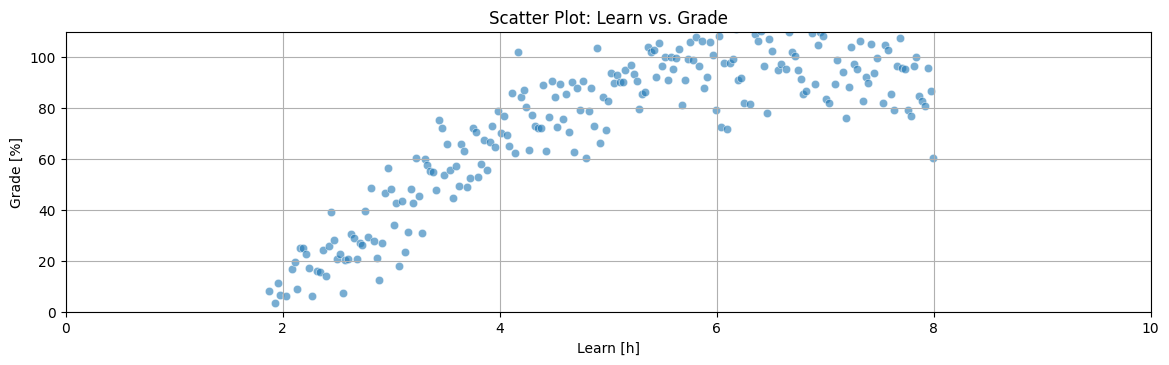

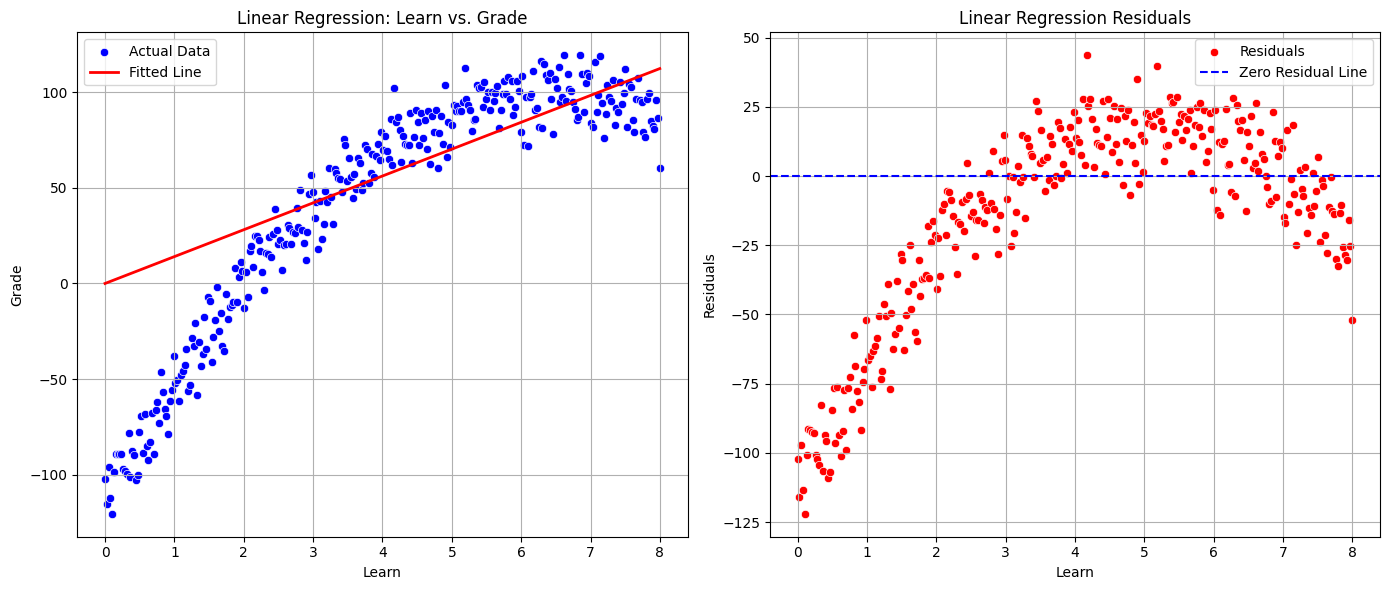

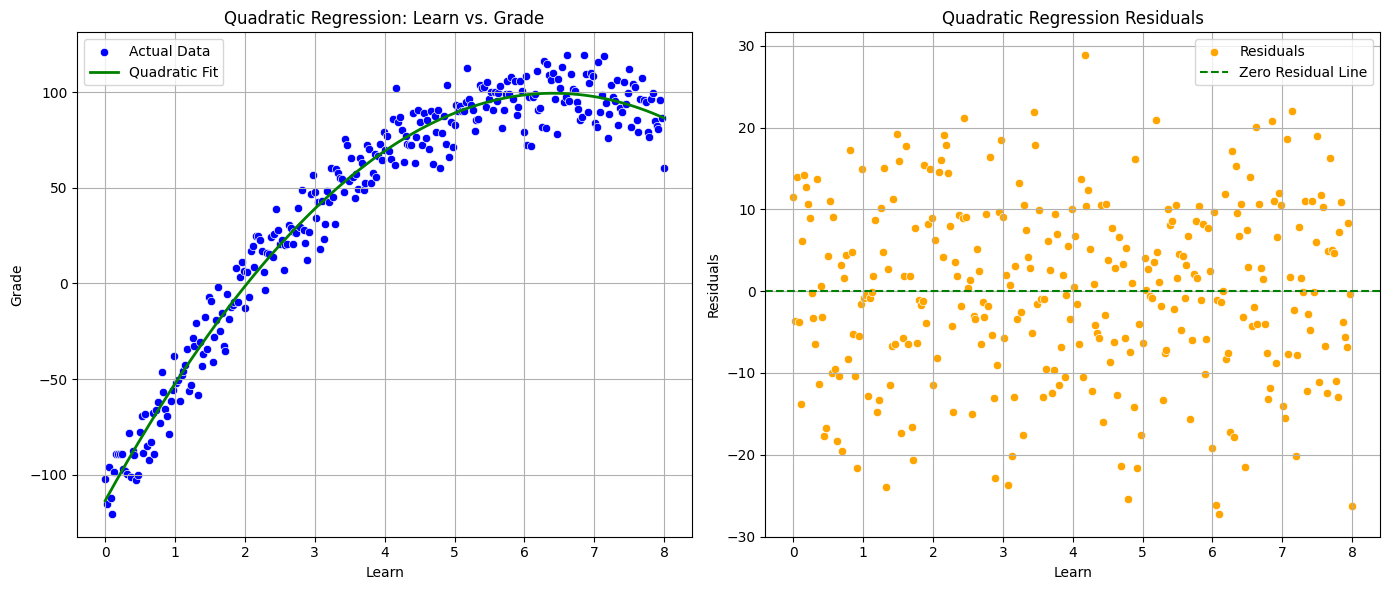

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     5177.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          4.31e-236
Time:                        17:26:42   Log-Likelihood:                -1170.7
No. Observations:                 308   AIC:                             2347.
Df Residuals:                     305   BIC:                             2359.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -113.6281      1.848    -61.489      0.0

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Simulate dataset
np.random.seed(69)  # For reproducibility
learn = np.linspace(0, 13, 500)  
grade = -5 * (learn - 6.5)**2 + 100 + np.random.normal(0, 10, learn.shape) 
data = pd.DataFrame({'learn': learn, 'grade': grade})
data = data[data['learn'] <= 8]
learn = np.array(data['learn'])
grade = np.array(data['grade'])


# Assuming your data is stored in a DataFrame called `data` and has columns 'learn' and 'grade'
# Example: data = pd.DataFrame({'learn': learn, 'grade': grade})

plt.figure(figsize=(14, 8))
# Scatter plot of the original data
plt.subplot(2, 1, 1)
sns.scatterplot(data=data, x='learn', y='grade', alpha=0.6)
plt.title('Scatter Plot: Learn vs. Grade')
plt.xlabel('Learn [h]')
plt.ylabel('Grade [%]')
plt.ylim(0, 110)  
plt.xlim(0, 10)  
plt.grid(True)

# Step 1: Fit the Linear Regression Model using statsmodels
linear_model = sm.OLS(grade, learn).fit()

# Step 2: Predict values from the linear model
linear_fit = linear_model.predict(learn)

# Step 3: Calculate residuals for the linear model
linear_residuals = linear_model.resid



# Step 4: Plot the original data and the linear regression line
plt.figure(figsize=(14, 6))

# Scatter plot of the actual data
plt.subplot(1, 2, 1)
sns.scatterplot(x=learn, y=grade, label='Actual Data', color='blue')

# Line plot of the fitted values
plt.plot(learn, linear_fit, color='red', label='Fitted Line', linewidth=2)

plt.title('Linear Regression: Learn vs. Grade')
plt.xlabel('Learn')
plt.ylabel('Grade')
plt.legend()
plt.grid(True)

# Step 5: Plot the residuals

# Scatter plot of residuals
plt.subplot(1, 2, 2)
sns.scatterplot(x=learn, y=linear_residuals, color='red', label='Residuals')

plt.axhline(0, color='blue', linestyle='--', label='Zero Residual Line')
plt.title('Linear Regression Residuals')
plt.xlabel('Learn')
plt.ylabel('Residuals')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


polynomial_features_p2 = PolynomialFeatures(degree=2, include_bias=True)  
learn_p2 = polynomial_features_p2.fit_transform(learn.reshape(-1, 1)) 

quadratic_model = sm.OLS(grade, learn_p2).fit()
quadratic_fit = quadratic_model.predict(learn_p2)
quadratic_residuals = quadratic_model.resid


# Step 5: Plot the Quadratic Regression Fit
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=learn, y=grade, label='Actual Data', color='blue')
plt.plot(learn, quadratic_fit, color='green', label='Quadratic Fit', linewidth=2)
plt.title('Quadratic Regression: Learn vs. Grade')
plt.xlabel('Learn')
plt.ylabel('Grade')
plt.legend()
plt.grid(True)

# Step 6: Plot the Quadratic Residuals
plt.subplot(1, 2, 2)
sns.scatterplot(x=learn, y=quadratic_residuals, color='orange', label='Residuals')
plt.axhline(0, color='green', linestyle='--', label='Zero Residual Line')
plt.title('Quadratic Regression Residuals')
plt.xlabel('Learn')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 7: Print the Quadratic Model Summary (Fit statistics)
print(quadratic_model.summary())

print(linear_model.summary())








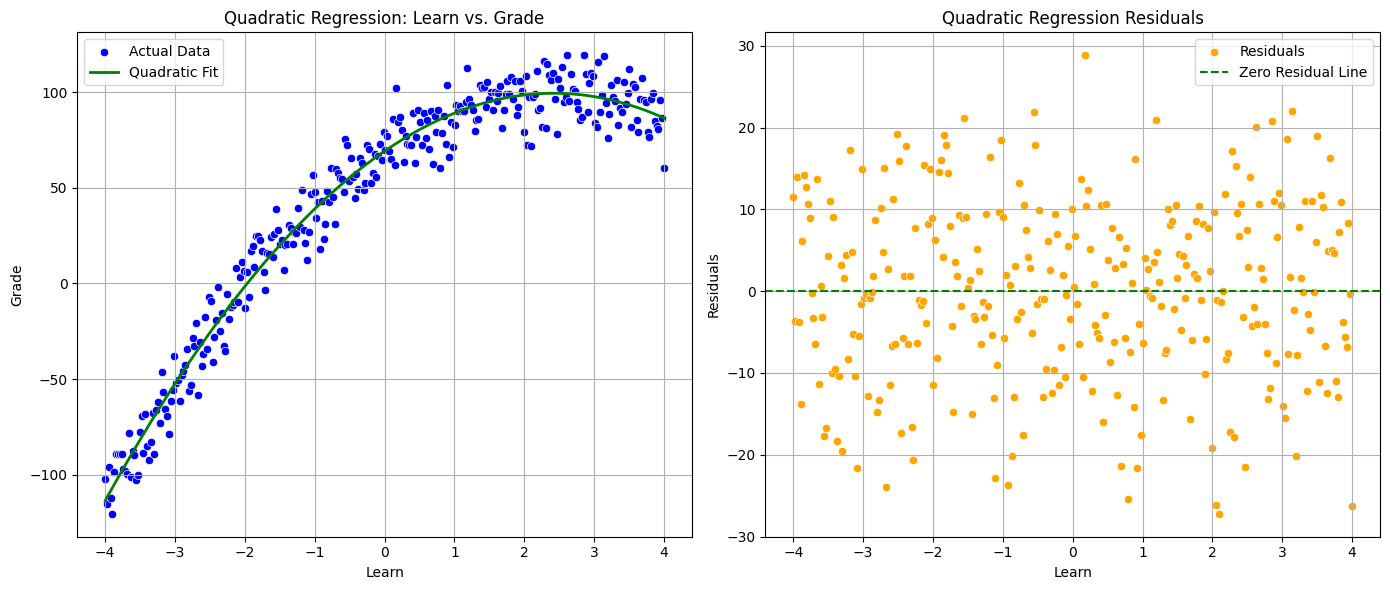

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     5177.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          4.31e-236
Time:                        17:31:25   Log-Likelihood:                -1170.7
No. Observations:                 308   AIC:                             2347.
Df Residuals:                     305   BIC:                             2359.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.2628      0.930     74.478      0.0

In [107]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Simulate dataset (again)
np.random.seed(69)  # For reproducibility
learn = np.linspace(0, 13, 500)  
grade = -5 * (learn - 6.5)**2 + 100 + np.random.normal(0, 10, learn.shape) 
data = pd.DataFrame({'learn': learn, 'grade': grade})
data = data[data['learn'] <= 8]

# Center predictor
data['learn_centered'] = data['learn'] - data['learn'].mean()

# You can ignore this
learn = np.array(data['learn_centered'])
grade = np.array(data['grade'])

polynomial_features_p2 = PolynomialFeatures(degree=2, include_bias=True)  
learn_p2 = polynomial_features_p2.fit_transform(learn.reshape(-1, 1)) 

quadratic_model = sm.OLS(grade, learn_p2).fit()
quadratic_fit = quadratic_model.predict(learn_p2)
quadratic_residuals = quadratic_model.resid

plt.figure(figsize=(14, 6))

# Plot the model
plt.subplot(1, 2, 1)
sns.scatterplot(x=learn, y=grade, label='Actual Data', color='blue')
plt.plot(learn, quadratic_fit, color='green', label='Quadratic Fit', linewidth=2)
plt.title('Quadratic Regression: Learn vs. Grade')
plt.xlabel('Learn')
plt.ylabel('Grade')
plt.legend()
plt.grid(True)

# Plot the residuals
plt.subplot(1, 2, 2)
sns.scatterplot(x=learn, y=quadratic_residuals, color='orange', label='Residuals')
plt.axhline(0, color='green', linestyle='--', label='Zero Residual Line')
plt.title('Quadratic Regression Residuals')
plt.xlabel('Learn')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(quadratic_model.summary())
